# MNIST visualization

In [28]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Load MNIST data

In [29]:
mnist = fetch_openml('mnist_784', version=1, cache=True)
X = mnist.data / 255.0
y = mnist.target

In [6]:
print(f'X.shape : {X.shape}')
print(f'y.shape : {y.shape}')

X.shape : (70000, 784)
y.shape : (70000,)


In [30]:
feat_cols = [f'pixel{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X.values, columns=feat_cols)
df['y'] = y
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [38]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

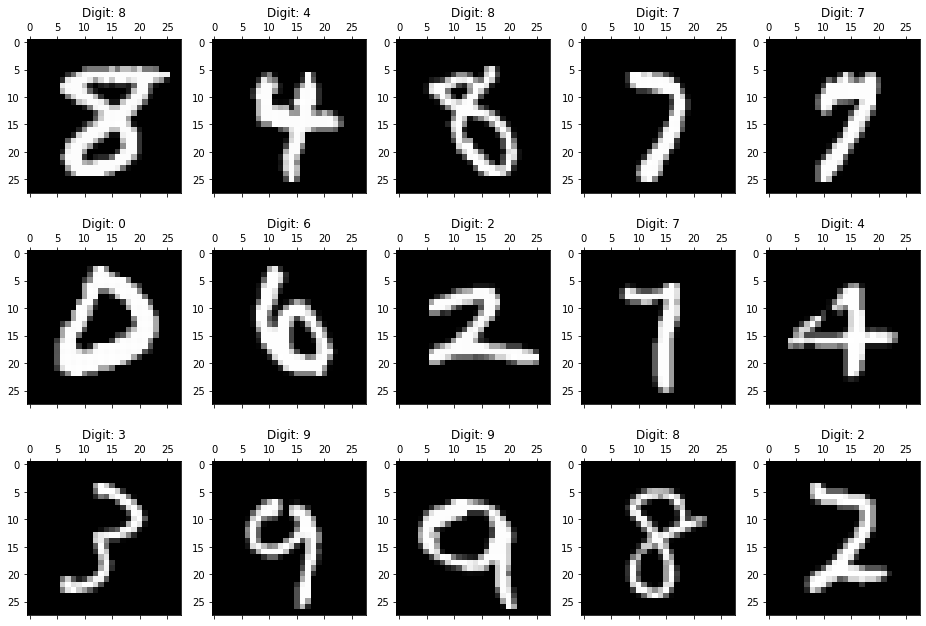

In [11]:
plt.gray()
fig = plt.figure( figsize=(16,11) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])))
    ax.matshow(df.loc[rndperm[i], feat_cols].values.reshape((28,28)).astype(float))
plt.show()

## PCA 시각화

In [31]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


# N = 10000
# df_subset = df.loc[rndperm[:N],:].copy()
# data_subset = df_subset[feat_cols].values
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data_subset)
# df_subset['pca-one'] = pca_result[:,0]
# df_subset['pca-two'] = pca_result[:,1]
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445]


In [32]:
pca_result

array([[ 0.47941879, -1.24008989],
       [ 3.96272066, -1.13720416],
       [-0.23136361,  1.54409313],
       ...,
       [-1.06473498,  2.31399826],
       [-1.2165581 , -0.45776475],
       [ 4.15240068, -0.32706557]])

In [35]:
df['pca-one']

0        0.479419
1        3.962721
2       -0.231364
3       -3.125357
4       -1.534572
           ...   
69995    1.198799
69996    2.232099
69997   -1.064735
69998   -1.216558
69999    4.152401
Name: pca-one, Length: 70000, dtype: float64

In [36]:
df['pca-two']

0       -1.240090
1       -1.137204
2        1.544093
3       -2.382139
4        2.861842
           ...   
69995   -2.155568
69996   -2.741193
69997    2.313998
69998   -0.457765
69999   -0.327066
Name: pca-two, Length: 70000, dtype: float64

In [39]:
df.loc[rndperm, :]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,pca-one,pca-two
46730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,2.844080,-1.582537
48393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.935113,2.598781
41416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,-0.268005,-0.378153
34506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-1.806426,1.783427
43725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,-1.640877,1.796143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,-0.498904,-0.762894
6265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,1.106595,0.502521
54886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.850544,-1.443372
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4.801558,-1.617516


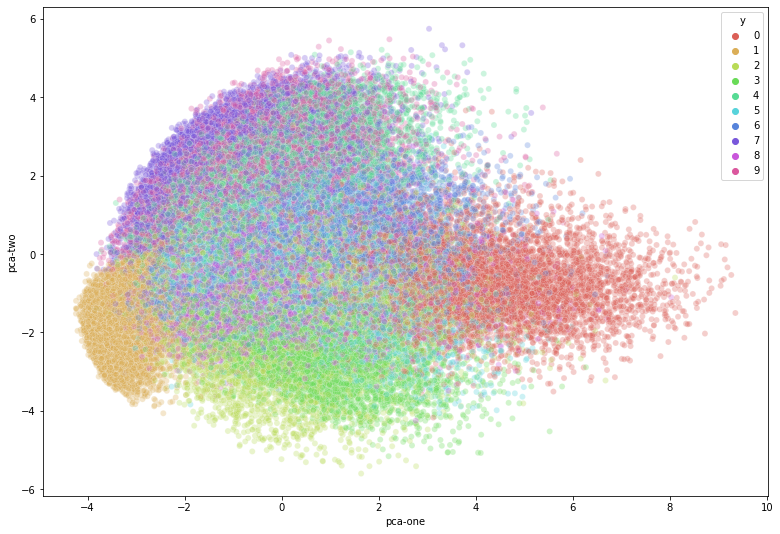

In [14]:
plt.figure(figsize=(13,9))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()

## t-SNE 시각화

In [27]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]b
df_subset['pca-two'] = pca_result[:,1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677]


In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/Users/eunbilee/opt/anaconda3/envs/CSE4007/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/eunbilee/opt/anaconda3/envs/CSE4007/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.021s...
[t-SNE] Computed neighbors for 10000 samples in 1.778s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.117974
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.848770
[t-SNE] KL divergence after 300 iterations: 2.785903
t-SNE done! Time elapsed:

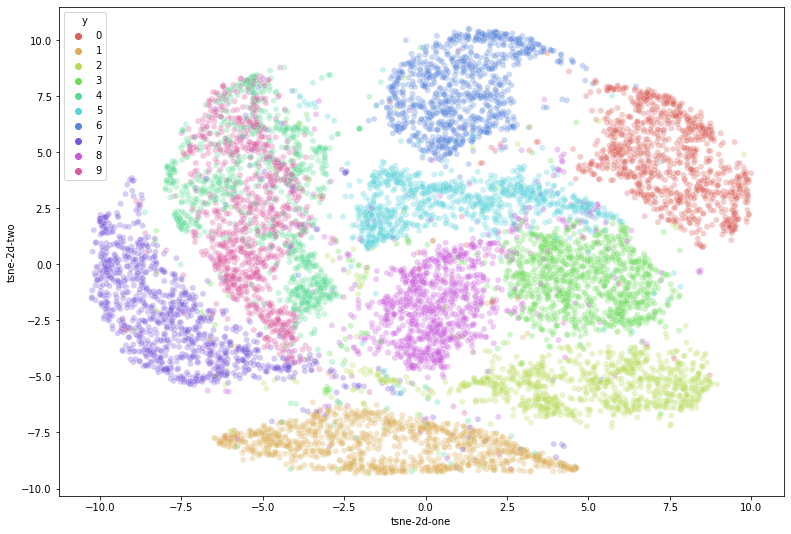

In [31]:
plt.figure(figsize=(13,9))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()

# PCA vs. t-SNE

<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

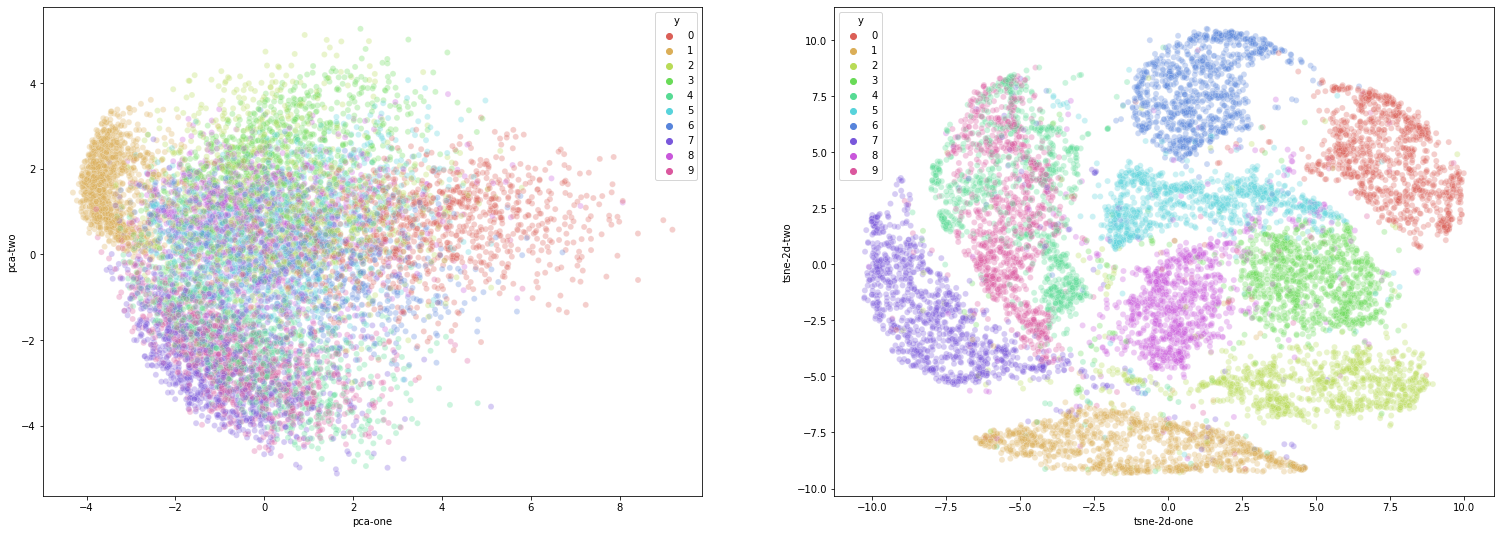

In [42]:
plt.figure(figsize=(26,9))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)